In [1]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")
using DrugResponseModel
concs, _, g1s1, g2s1 = load(189, 1);
_, _, g1s2, g2s2 = load(189, 2);
_, _, g1s3, g2s3 = load(189, 3);
g0 = g1s1[1,1,1]+g2s1[1,1,1];
g1m = (g1s1 .+ g1s2 .+ g1s3) ./ 3;
g2m = (g2s1 .+ g2s2 .+ g2s3) ./ 3;


Precompiling project...
  ✓ DrugResponseModel
1 dependency successfully precompiled in 8 seconds (139 already precompiled)
  Activating environment at `~/ODE/DrugResponseModel.jl/Project.toml`


In [2]:
_, pControl = DrugResponseModel.optimise_control(g1m[:, 1, 1], g2m[:, 1, 1])

a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 1, 2)


Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 100001 steps and 8.87 seconds
Termination reason: Max number of steps (100000) reached
Steps per second = 11267.80
Function evals per second = 11278.05
Improvements/step = 0.11411
Total function evaluations = 100092


Best candidate found: [2.0, 0.170798, 0.193937, 0.217277, 0.0444128, 0.000100005, 0.000100005, 0.000100009, 0.573911]

Fitness: 273.337188952



LoadError: MethodError: no method matching residHill(::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Matrix{Float64}, ::Matrix{Float64})
Closest candidates are:
  residHill(::Vector{T} where T, ::Vector{T} where T, !Matched::Matrix{T} where T, ::Matrix{T} where T) at /home/farnazm/ODE/DrugResponseModel.jl/src/Hill.jl:8

In [ ]:
using Plots

pp1 = DrugResponseModel.getODEparamspairs(p1, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

In [ ]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 34295 evals, 34205 steps, improv/step: 0.137 (last = 0.1370), fitness=11484.385848587
DE modify state:
200.00 secs, 68649 evals, 68562 steps, improv/step: 0.140 (last = 0.1421), fitness=10394.959890179
DE modify state:
300.00 secs, 102894 evals, 102812 steps, improv/step: 0.139 (last = 0.1384), fitness=10372.720832884
DE modify state:
400.00 secs, 137208 evals, 137134 steps, improv/step: 0.139 (last = 0.1372), fitness=10180.440801545
DE modify state:
500.01 secs, 171457 evals, 171387 steps, improv/step: 0.140 (last = 0.1461), fitness=9758.741706201
DE modify state:

Optimization stopped after 200001 steps and 582.70 seconds
Termination reason: Max number of steps (200000) reached
Steps p

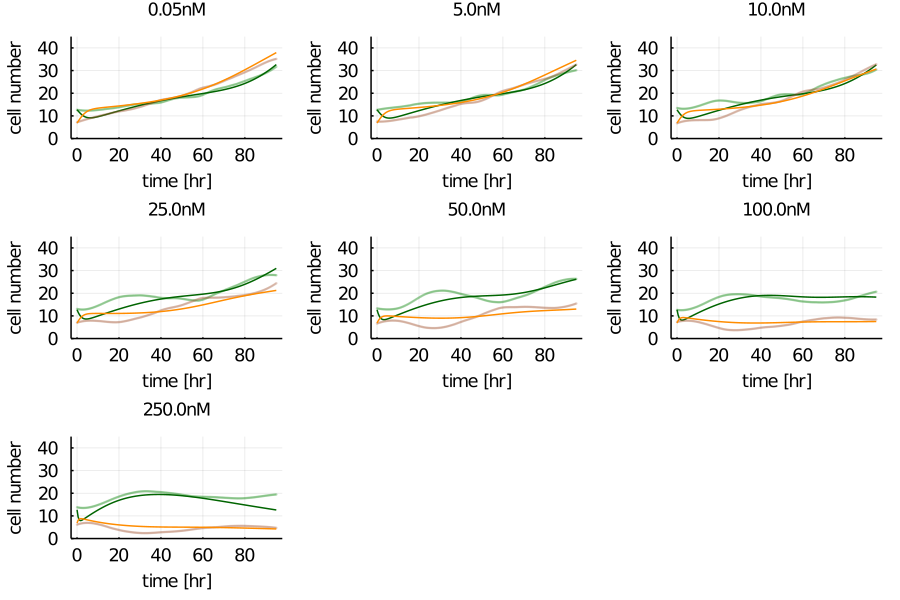

In [5]:
a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 1, 3)

pp1 = DrugResponseModel.getODEparamspairs(p1, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)


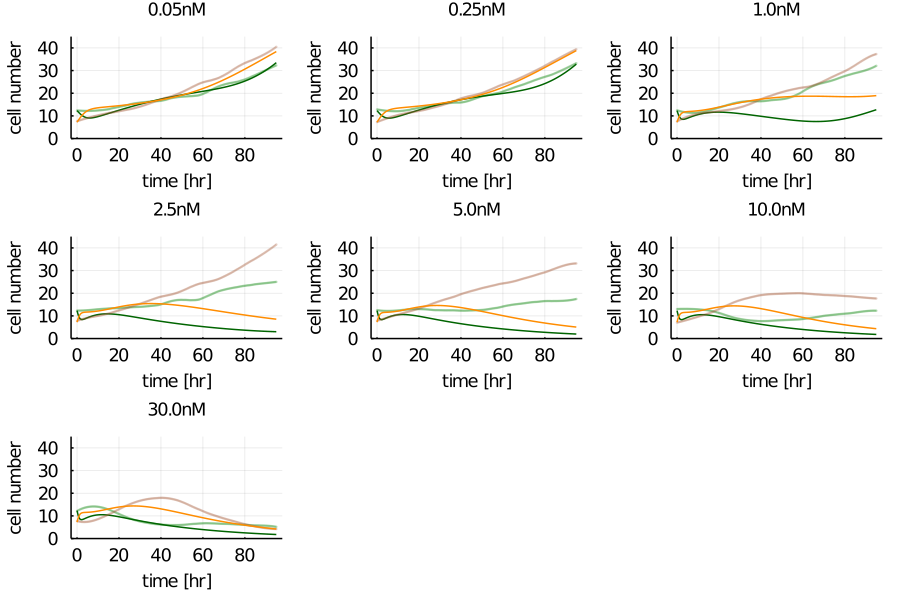

In [6]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], 1, :false, concs[1, 3])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], i, :false, concs[i, 3]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 33781 evals, 33673 steps, improv/step: 0.133 (last = 0.1326), fitness=12177.722098628
DE modify state:
200.00 secs, 67679 evals, 67574 steps, improv/step: 0.128 (last = 0.1237), fitness=10943.079977107
DE modify state:
300.01 secs, 101604 evals, 101503 steps, improv/step: 0.129 (last = 0.1313), fitness=10855.932914360
DE modify state:
400.01 secs, 135282 evals, 135186 steps, improv/step: 0.133 (last = 0.1443), fitness=10384.594916781
DE modify state:
500.01 secs, 168948 evals, 168862 steps, improv/step: 0.131 (last = 0.1221), fitness=10322.163809672
DE modify state:

Optimization stopped after 200001 steps and 593.53 seconds
Termination reason: Max number of steps (200000) reached
Steps 

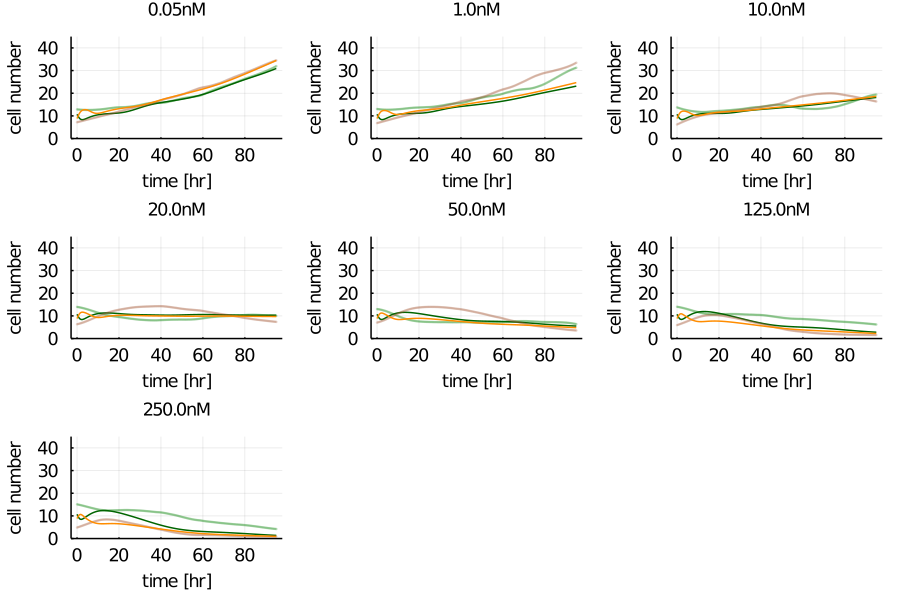

In [7]:
a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 2, 3)
using Plots
pp1 = DrugResponseModel.getODEparamspairs(p1, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

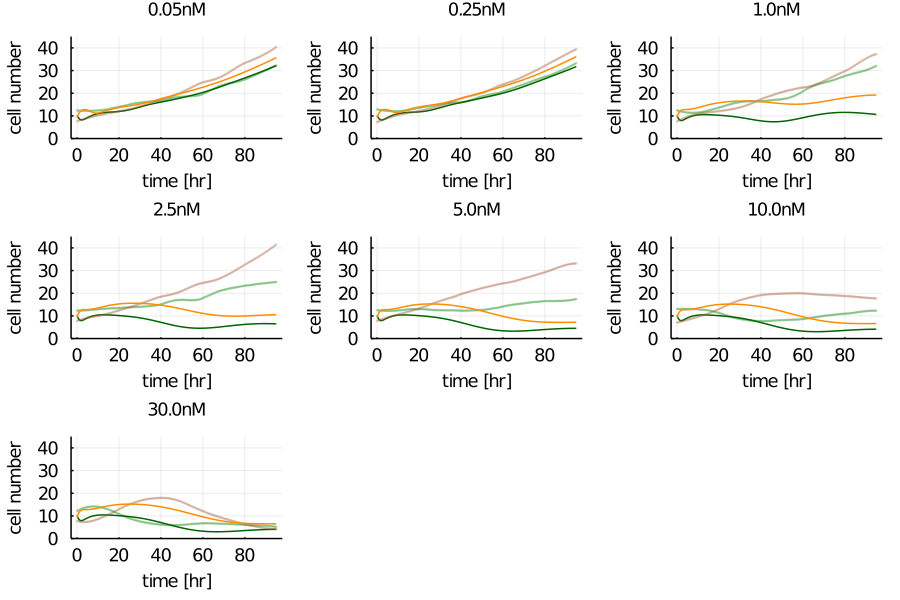

In [8]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], 1, :false, concs[1, 3])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 3], g2m[:, :, 3], i, :false, concs[i, 3]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.01 secs, 34295 evals, 34201 steps, improv/step: 0.136 (last = 0.1361), fitness=8799.576556781
DE modify state:
200.01 secs, 68837 evals, 68751 steps, improv/step: 0.129 (last = 0.1225), fitness=7975.959985162
DE modify state:
300.01 secs, 100985 evals, 100906 steps, improv/step: 0.124 (last = 0.1125), fitness=7645.379286164
DE modify state:
400.01 secs, 134823 evals, 134750 steps, improv/step: 0.127 (last = 0.1360), fitness=7448.958694379
DE modify state:
500.02 secs, 168623 evals, 168557 steps, improv/step: 0.124 (last = 0.1141), fitness=7304.183831084
DE modify state:

Optimization stopped after 200001 steps and 593.55 seconds
Termination reason: Max number of steps (200000) reached
Steps per s

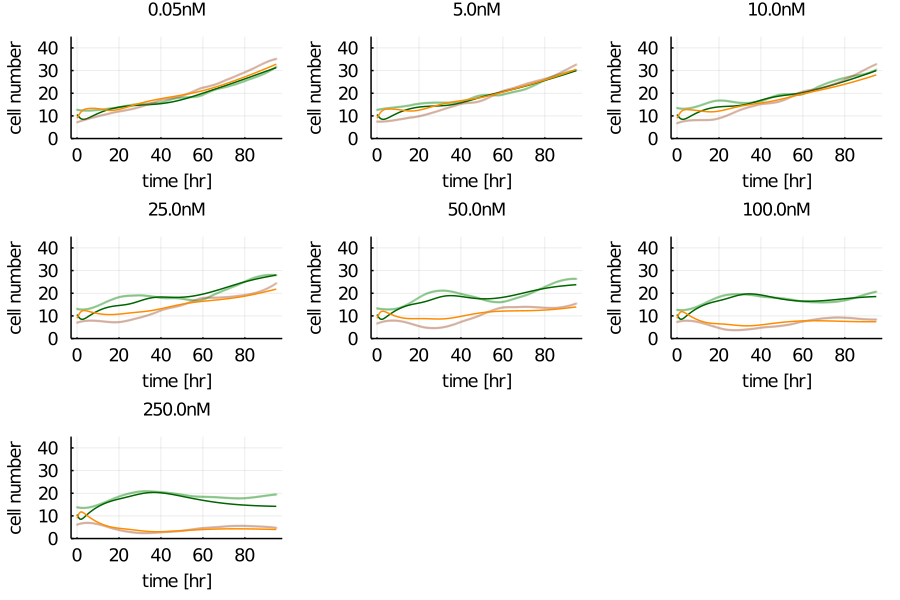

In [9]:
a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 1, 4)

pp1 = DrugResponseModel.getODEparamspairs(p1, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], 1, :false, concs[1, 1])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 1], g2m[:, :, 1], i, :false, concs[i, 1]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

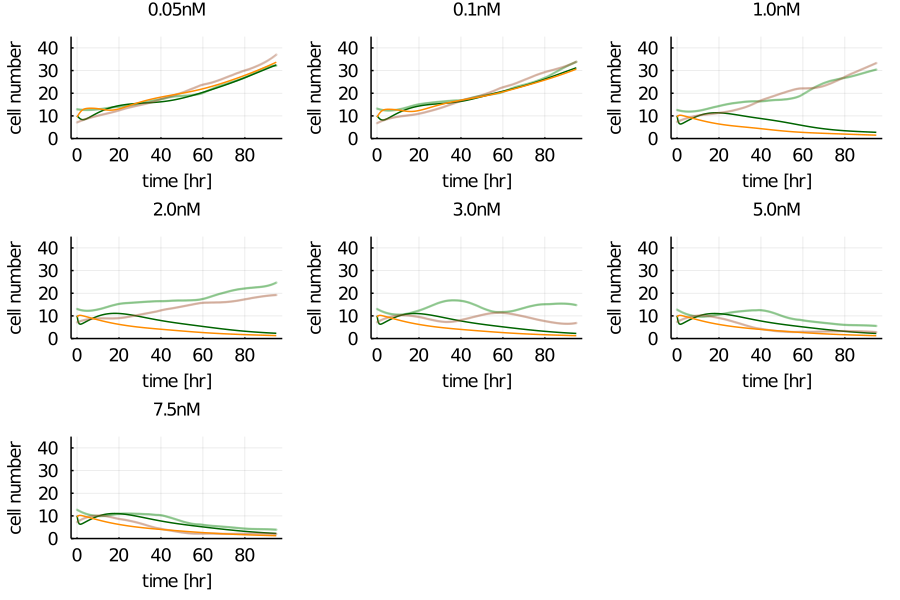

In [10]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], 1, :false, concs[1, 4])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], i, :false, concs[i, 4]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 33789 evals, 33683 steps, improv/step: 0.141 (last = 0.1413), fitness=9963.286821628
DE modify state:
200.00 secs, 67501 evals, 67398 steps, improv/step: 0.135 (last = 0.1295), fitness=9137.389787592
DE modify state:
300.01 secs, 101298 evals, 101197 steps, improv/step: 0.138 (last = 0.1425), fitness=9120.787590919
DE modify state:
400.01 secs, 134992 evals, 134894 steps, improv/step: 0.137 (last = 0.1335), fitness=9104.319458648
DE modify state:
500.01 secs, 168689 evals, 168596 steps, improv/step: 0.138 (last = 0.1432), fitness=9061.758368436
DE modify state:

Optimization stopped after 200001 steps and 593.24 seconds
Termination reason: Max number of steps (200000) reached
Steps per s

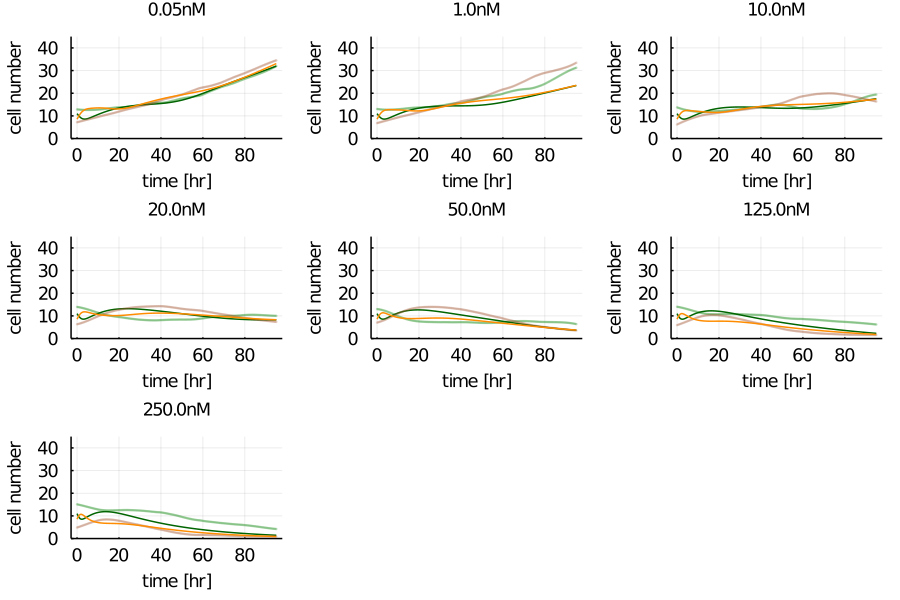

In [11]:
a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 2, 4)

pp1 = DrugResponseModel.getODEparamspairs(p1, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], 1, :false, concs[1, 2])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 2], g2m[:, :, 2], i, :false, concs[i, 2]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

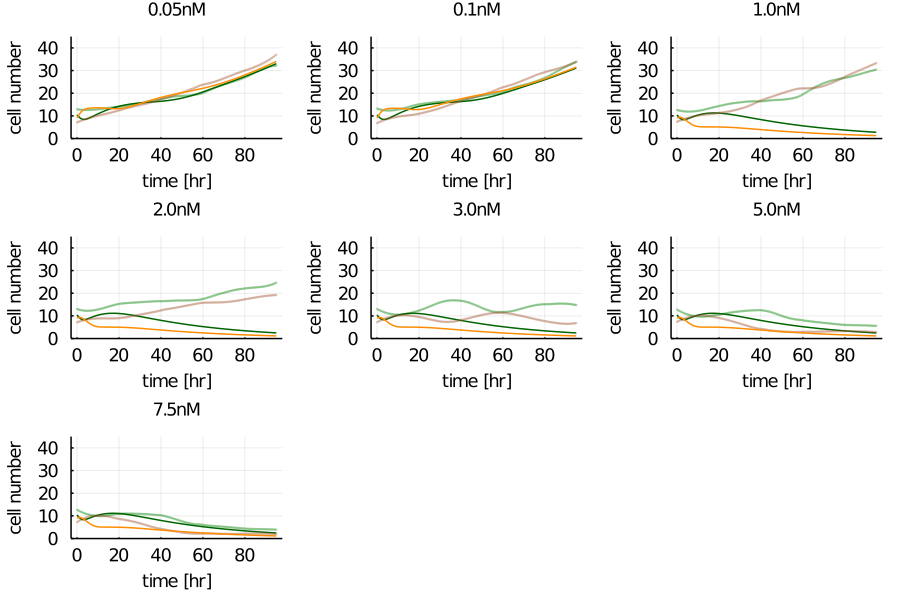

In [12]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], 1, :false, concs[1, 4])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], i, :false, concs[i, 4]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:
100.00 secs, 33193 evals, 33093 steps, improv/step: 0.139 (last = 0.1391), fitness=10351.979277692
DE modify state:
200.00 secs, 66802 evals, 66707 steps, improv/step: 0.136 (last = 0.1327), fitness=9026.346885285
DE modify state:
300.00 secs, 100741 evals, 100653 steps, improv/step: 0.134 (last = 0.1293), fitness=8281.219338883
DE modify state:
400.00 secs, 134170 evals, 134089 steps, improv/step: 0.132 (last = 0.1255), fitness=8161.407798936
DE modify state:
500.01 secs, 167649 evals, 167573 steps, improv/step: 0.131 (last = 0.1266), fitness=8142.773100534
DE modify state:

Optimization stopped after 200001 steps and 596.90 seconds
Termination reason: Max number of steps (200000) reached
Steps per 

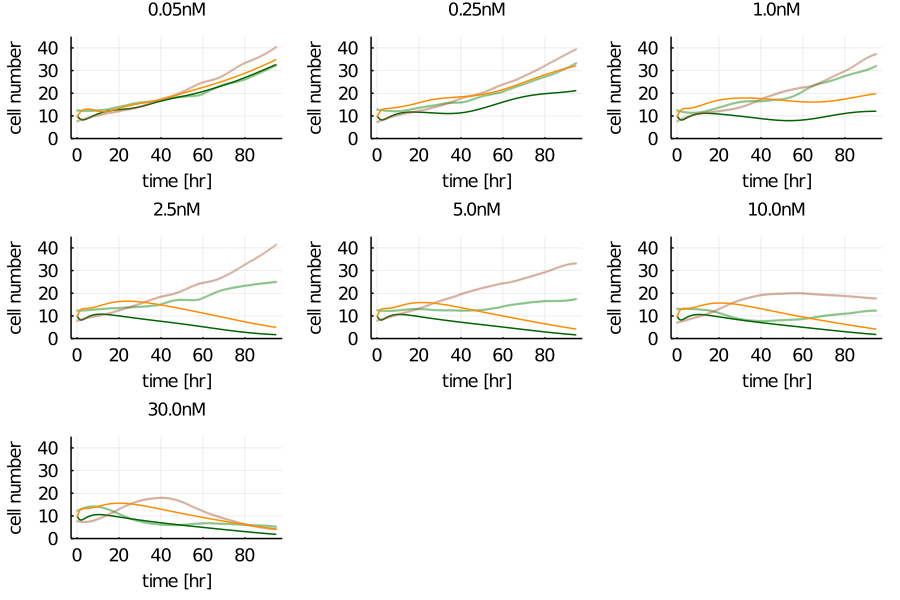

In [13]:
a, p1 = DrugResponseModel.BBoptim_DrugPairs(concs, g1m, g2m, 3, 4)

pp1 = DrugResponseModel.getODEparamspairs(p1, concs);
G1 = zeros(189, 7, 2)
G2 = zeros(189, 7, 2)
t = LinRange(0.0, 95.0, 189)
for k=1:2 # drug number
    for i = 1:7 # concentration number
        G1[:, i, k], G2[:, i, k], _ = predict(pp1[:, i, k], g0, t)
    end
end

p1 = DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 3], g2m[:, :, 3], 1, :false, concs[1, 3])
p =[DrugResponseModel.plotavg(G1[:, :, 1], G2[:, :, 1], g1m[:, :, 3], g2m[:, :, 3], i, :false, concs[i, 3]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150)

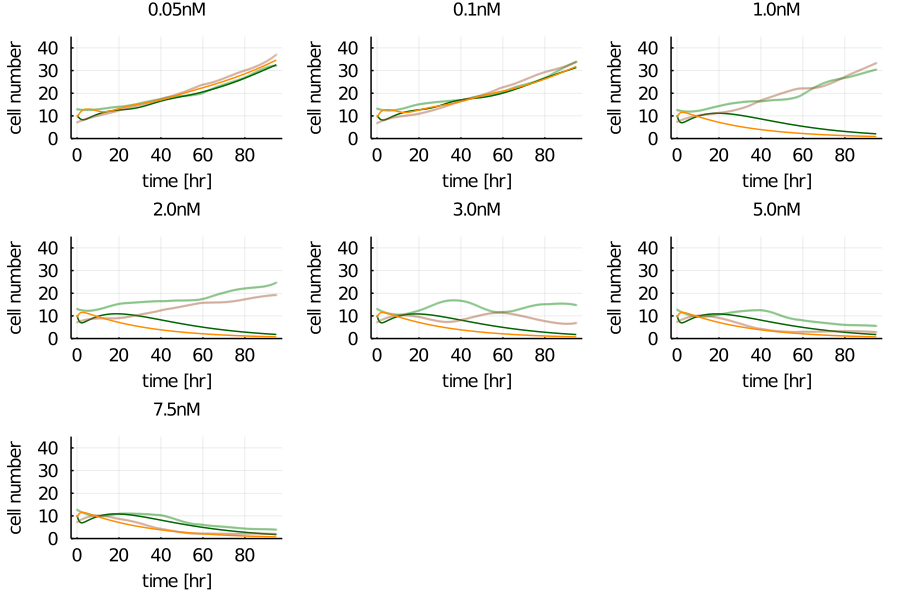

In [14]:
p1 = DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], 1, :false, concs[1, 4])
p =[DrugResponseModel.plotavg(G1[:, :, 2], G2[:, :, 2], g1m[:, :, 4], g2m[:, :, 4], i, :false, concs[i, 4]) for i=2:7]
plot(p1, p..., figsize=(1000, 700), dpi=150) 

In [4]:
pp1

LoadError: UndefVarError: pp1 not defined